# 1. Perkenalan Dataset

## 1) Sumber Dataset

Dataset ini diambil dari public repository Kaggle dengan nama "Students Performance during e-learning". Dataset ini berisi informasi tentang karakteristik akademik siswa sebelum dan sesudah pandemi, yang dapat digunakan untuk analisis lebih lanjut.

## 2) Ketentuan Dataset

* Tanpa label: Dataset ini tidak memiliki kolom label atau kelas, sehingga cocok untuk metode unsupervised learning seperti clustering.

* Jumlah Baris: Dataset ini memiliki 1000 baris, memenuhi syarat untuk analisis yang bermakna.

* Tipe Data:
    - Data Kategorikal: Misalnya, jenis kelamin (`gender`), alat yang digunakan untuk belajar (`tools`), tingkat pendidikan (`level of education`), kesehatan mental (`mental health`), dan metode tes (`test mode`).
    - Data Numerikal: Misalnya, skor sebelum pandemi (`score before pandemic`), skor setelah pandemi (`score after pandemic`), dan skor agregat (`aggregate score`).

## 3) Pembatasan

Dataset ini belum digunakan dalam latihan clustering sebelumnya, sehingga dapat dieksplorasi lebih lanjut untuk memahami pola belajar siswa dan faktor yang memengaruhi kinerja akademik mereka.

## 4) Tujuan Analisis

Tujuan dari analisis ini adalah untuk menemukan pola dalam perilaku belajar siswa dengan menggunakan teknik unsupervised learning, seperti clustering. Dengan demikian, kita dapat mengelompokkan siswa berdasarkan pola belajar mereka dan memahami faktor-faktor yang memengaruhi performa akademik mereka.

# 2. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# 3. Memuat Dataset

- read file dataset kita, kemudian tampilkan kolom apa saja yang ada di datasetnya.
- disini saya file datasetnya saya masukan ke colab nya langsung

In [ ]:
file_path = "StudentsPerformance1.csv"
df = pd.read_csv(file_path)
print('Kolom Student Performance', df.columns)

Kolom Student Performance Index(['gender', 'tools', 'level of education', 'mental health', 'test mode',
       'score before pandemic', 'score after pandemic', 'aggregate score'],
      dtype='object')


# 4. Exploratory Data Analysis (EDA)

## 1. Memahami Struktur Data

Langkah pertama dilakukan untuk memahami struktur dataset. Dimulai dengan menampilkan jumlah baris dan kolom untuk mengetahui ukuran dataset, lalu melihat tipe data di setiap kolom. Selanjutnya, lima baris pertama dataset ditampilkan untuk memberikan gambaran awal. Terakhir, kolom numerikal dan kategorikal dipisahkan guna memudahkan proses analisis lebih lanjut.

In [ ]:
# menampilkan jumlah baris dan kolom
total_rows, total_columns = df.shape
print(f"Dataset memiliki {total_rows} baris dan {total_columns} kolom.\n")
print('_' * 50)

# menampilkan tipe data dari setiap kolom
print("Tipe data pada setiap kolom:")
print(df.dtypes)
print('_' * 50)

# menampilkan 5 baris pertama dataset
print("\nLima baris pertama dataset:")
display(df.head())
print('_' * 50)

# memisahkan kolom numerikal dan kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nKolom Kategorikal: {categorical_cols}")
print(f"Kolom Numerikal: {numerical_cols}")

Dataset memiliki 1000 baris dan 8 kolom.

__________________________________________________
Tipe data pada setiap kolom:
gender                    object
tools                     object
level of education        object
mental health             object
test mode                 object
score before pandemic      int64
score after pandemic       int64
aggregate score          float64
dtype: object
__________________________________________________

Lima baris pertama dataset:


,gender,tools,level of education,mental health,test mode,score before pandemic,score after pandemic,aggregate score
0,female,Computer,bachelor's degree,normal,online,72,72,72.0
1,female,Mobile,college,normal,offline,69,90,79.5
2,female,Computer,college,normal,online,90,95,92.5
3,male,Tablet,associate's degree,stressed,online,47,57,52.0
4,male,Mobile,college,normal,online,76,78,77.0


__________________________________________________

Kolom Kategorikal: ['gender', 'tools', 'level of education', 'mental health', 'test mode']
Kolom Numerikal: ['score before pandemic', 'score after pandemic', 'aggregate score']


## 2. Menangani Data yang Hilang

Langkah kedua dilakukan untuk memeriksa keberadaan missing value dalam dataset. Berdasarkan output yang dihasilkan, tidak ditemukan adanya missing value, sehingga tidak diperlukan penanganan lebih lanjut.

In [ ]:
print("\n📌 Menganalisis Missing Values pada Dataset Students Performance")
print('_' * 70)

# mengecek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Missing Values per Kolom:")
print(missing_values)
print('_' * 70)

# menentukan langkah-langkah apa yang dapat dilakukan
if missing_values.any():
    print("\nLangkah yang bisa dilakukan untuk menangani missing values:")
    for column in missing_values.index:
        if missing_values[column] > 0:
            if df[column].dtype == 'object':
                print(f"   - Kolom {column} memiliki missing values. Bisa diisi dengan modus.")
            else:
                print(f"   - Kolom {column} memiliki missing values. Bisa diisi dengan rata-rata.")
else:
    print("✅ Tidak ada missing values, tidak perlu tindakan.")



📌 Menganalisis Missing Values pada Dataset Students Performance
______________________________________________________________________
Missing Values per Kolom:
gender                   0
tools                    0
level of education       0
mental health            0
test mode                0
score before pandemic    0
score after pandemic     0
aggregate score          0
dtype: int64
______________________________________________________________________
✅ Tidak ada missing values, tidak perlu tindakan.


## 3. Analisis Distribusi dan Korelasi

**Analisis Distribusi dengan Histogram**

Kode ini membuat histogram untuk memvisualisasikan distribusi setiap variabel numerik dalam dataset. Dari hasil visualisasi, membuat kita dapat memahami pola sebaran data, mengidentifikasi distribusi yang dominan, serta mendeteksi adanya potensi outlier atau pola khusus lainnya.

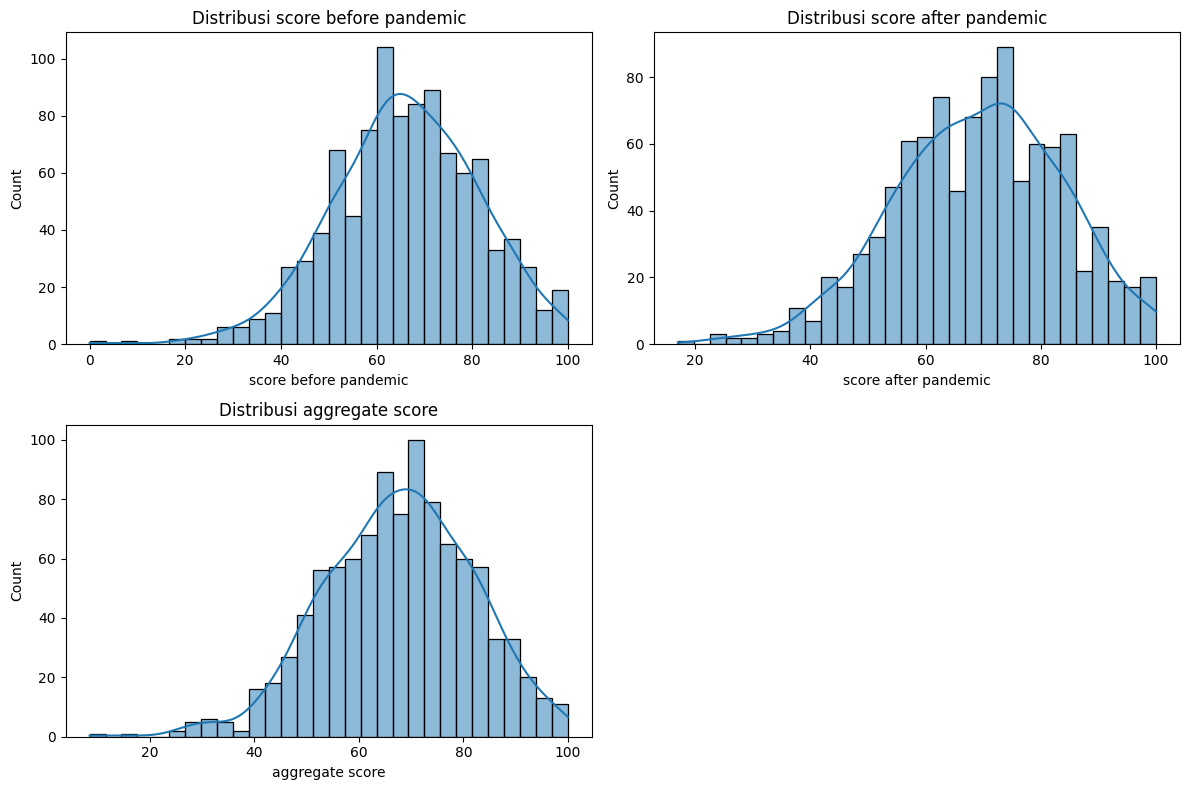

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color='tab:blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Analisis Korelasi dengan Heatmap**

Kode ini menampilkan heatmap untuk memperlihatkan matriks korelasi antar variabel numerik dalam dataset. Visualisasi ini membantu mengidentifikasi hubungan linear antar variabel, di mana nilai korelasi yang mendekati 1 atau -1 menunjukkan hubungan yang kuat, sedangkan nilai mendekati 0 menandakan hubungan yang lemah atau tidak ada hubungan.

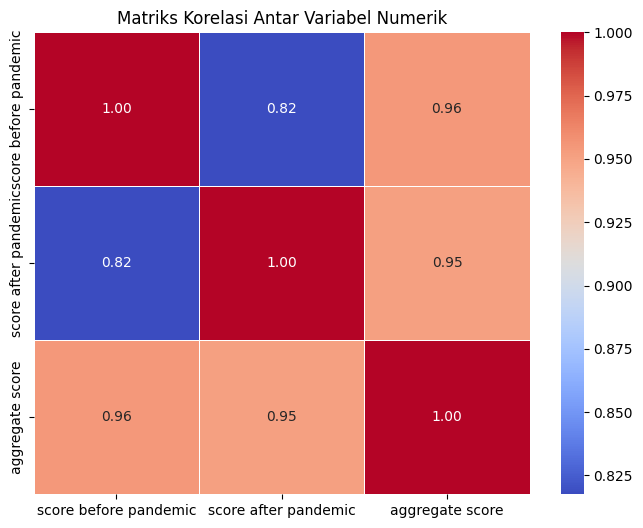

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

## 4. Visualisasi Data

**Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.**

Kode ini membuat bar plot untuk memvisualisasikan distribusi setiap variabel kategorikal dalam dataset. Visualisasi ini memudahkan untuk melihat jumlah kemunculan masing-masing kategori pada setiap variabel, sehingga pola atau ketidakseimbangan data antar kategori dapat diidentifikasi dengan lebih jelas.

<ipython-input-7-a50df5a33044>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-7-a50df5a33044>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-7-a50df5a33044>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-7-a50df5a33044>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

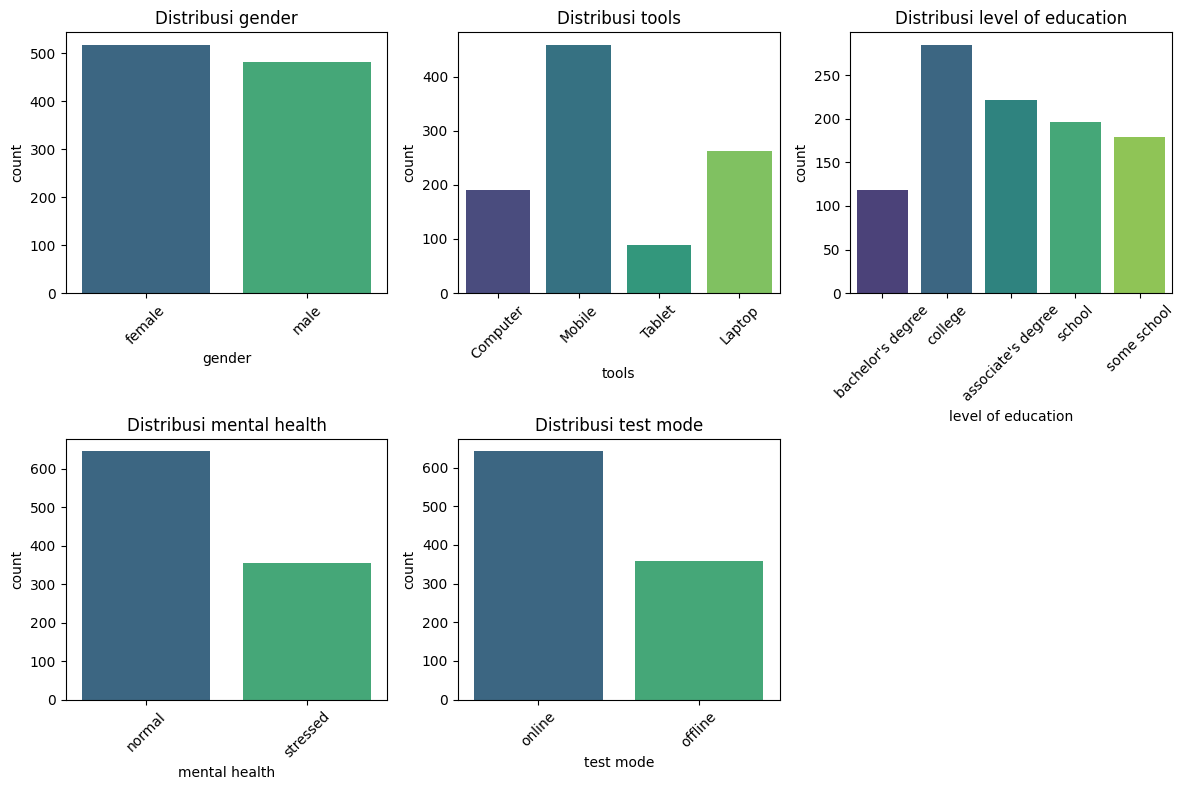

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.**

Kode ini menampilkan heatmap untuk memvisualisasikan korelasi antar variabel numerik dalam dataset. Heatmap memudahkan identifikasi hubungan antar variabel, di mana nilai korelasi yang mendekati 1 menunjukkan hubungan positif yang kuat, sedangkan nilai mendekati -1 menunjukkan hubungan negatif yang kuat. Nilai yang mendekati 0 menandakan tidak adanya hubungan yang signifikan.

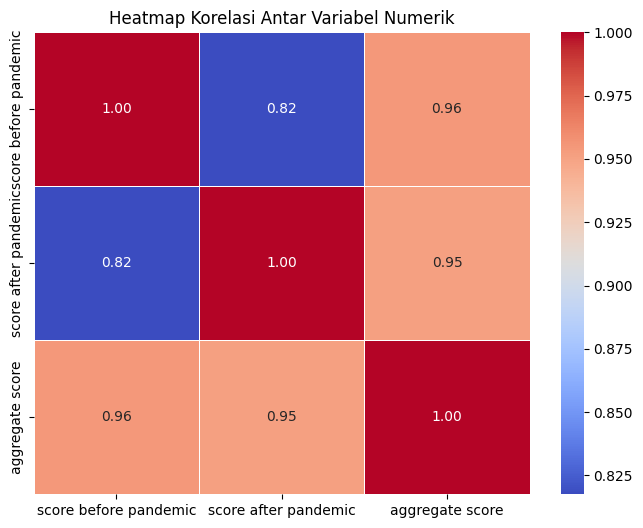

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

# 5. Data Preprocessing

## 1️⃣ Menghapus atau Menangani Data Kosong (Missing Values)

karena saat di EDA tidak ada missing value, jadi tidak ada penanganan apapun

In [ ]:
# tidak perlu dilakukan penanganan karena saat di EDA tidak ada missing value

## 2️⃣ Menghapus Data Duplikat

Kode ini digunakan untuk memeriksa jumlah data duplikat dalam dataset. Berdasarkan hasilnya, terdapat 6 baris duplikat yang kemudian dihapus, sehingga jumlah total baris dalam dataset menjadi 994. Proses ini memastikan bahwa analisis yang dilakukan selanjutnya tidak terpengaruh oleh data yang berulang.

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_rows}")
print('_' * 43)

# menghapus data duplikat (jika ada)
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print(f"✅ Data duplikat telah dihapus. Dataset sekarang memiliki {df.shape[0]} baris.")
else:
    print("✅ Tidak ada data duplikat dalam dataset.")

Jumlah data duplikat: 6
___________________________________________
✅ Data duplikat telah dihapus. Dataset sekarang memiliki 994 baris.


## 3️⃣ Normalisasi atau Standarisasi Fitur

menormalisasi variabel numerik menggunakan StandardScaler agar semua fitur memiliki skala yang sama, dengan mean 0 dan standar deviasi 1, sehingga data siap untuk proses clustering.

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("✅ Data numerik telah dinormalisasi menggunakan StandardScaler.")

✅ Data numerik telah dinormalisasi menggunakan StandardScaler.


<ipython-input-11-5c10c36e0a18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## 4️⃣ Deteksi dan Penanganan Outlier

mendeteksi outlier menggunakan boxplot untuk setiap variabel numerik. Dari visualisasi awal, terlihat beberapa titik di luar "whiskers" boxplot, menandakan adanya outlier. Selanjutnya, outlier dihapus menggunakan metode Interquartile Range (IQR). Setelah pembersihan, visualisasi ulang menunjukkan distribusi data yang lebih rapi tanpa nilai ekstrem, membuat model lebih stabil dalam proses clustering.

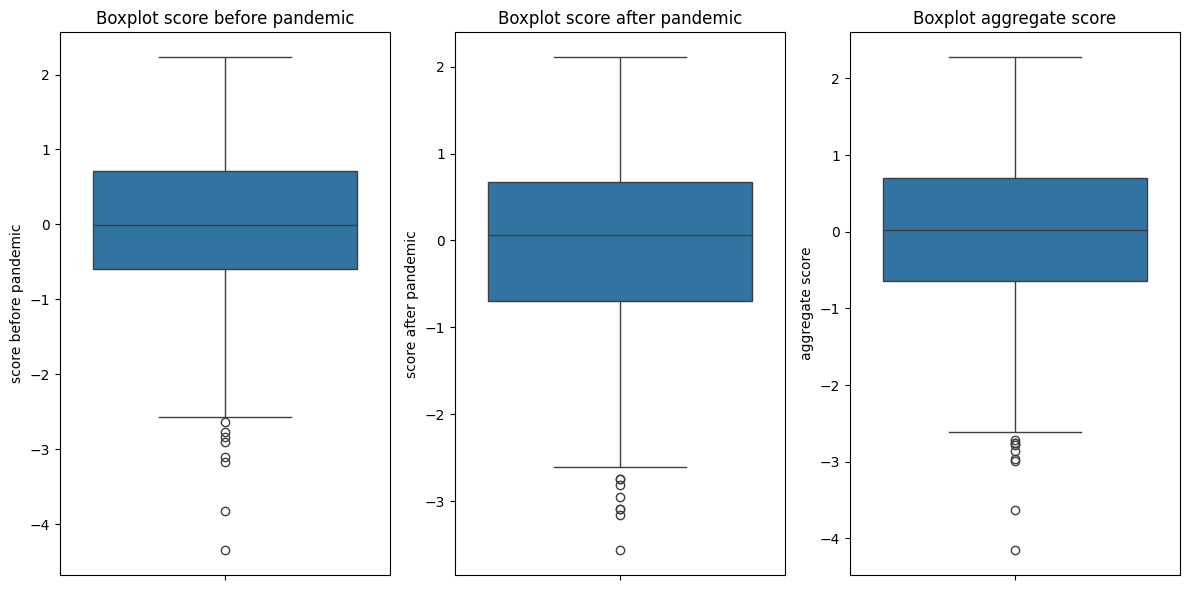

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
✅ Data setelah menghapus outlier memiliki 980 baris.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


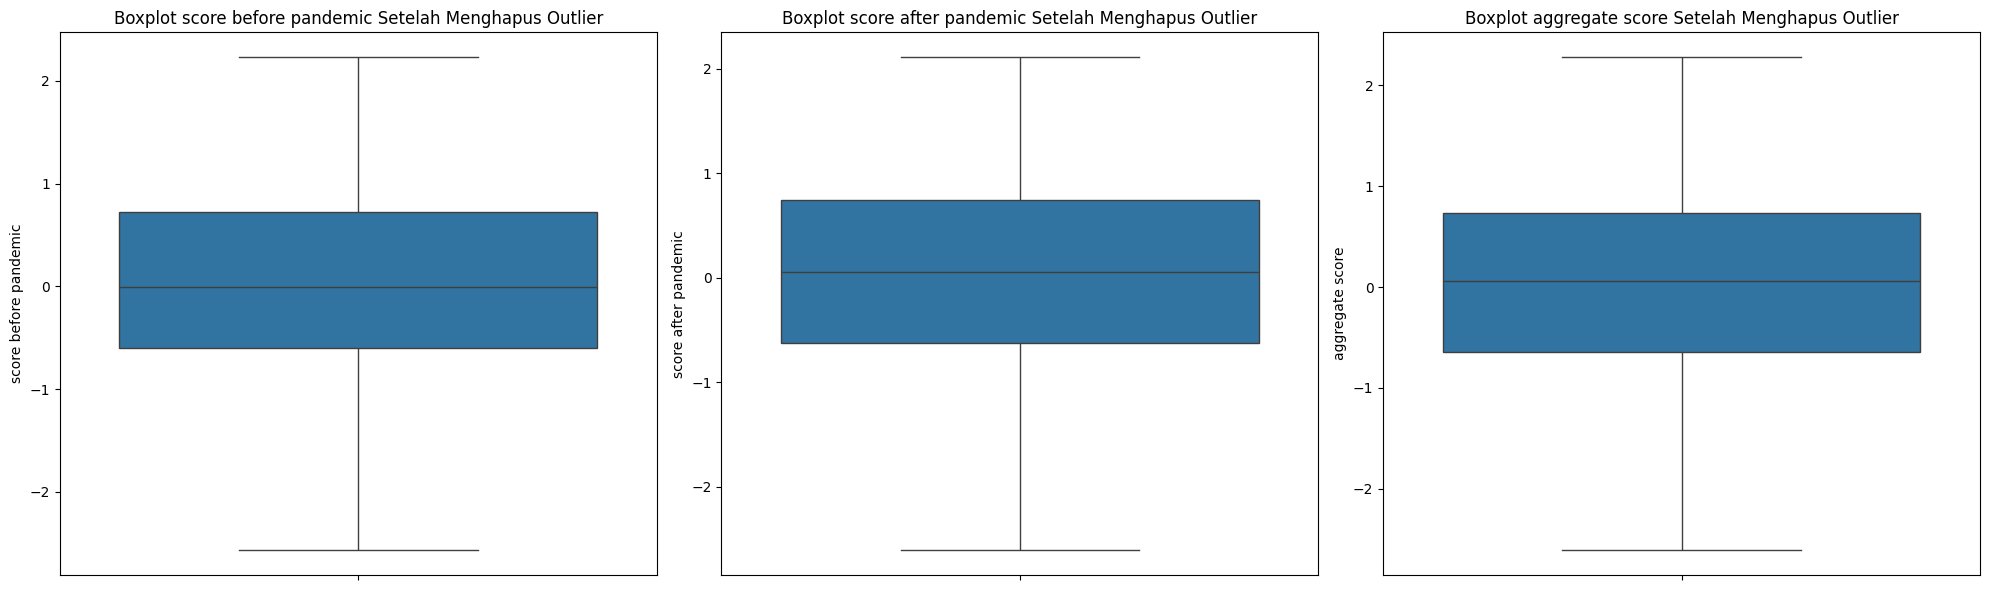

In [ ]:
# boxplot untuk deteksi outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()
print('-' * 180)

# menghapus outlier dengan metode IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

print(f"✅ Data setelah menghapus outlier memiliki {df_cleaned.shape[0]} baris.")
print('-' * 180)

# visualisasi setelah menghapus outlier
plt.figure(figsize=(20, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot {col} Setelah Menghapus Outlier')
plt.tight_layout()
plt.show()

## 5️⃣ Encoding Data Kategorikal

menerapkan Label Encoding pada kolom kategorikal, mengubah nilai kategori menjadi representasi numerik. Proses ini memudahkan algoritma dalam memahami dan memproses data kategorikal selama analisis atau pemodelan.

In [ ]:
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("✅ Data kategorikal telah dienkode menggunakan Label Encoding.")

✅ Data kategorikal telah dienkode menggunakan Label Encoding.


## 6️⃣ Binning (Pengelompokan Data Numerik ke dalam Kategori)

disini menggunakan KBinsDiscretizer untuk membagi data numerik menjadi empat kategori dengan lebar interval yang sama. Proses ini membantu mengubah data kontinu menjadi data kategorikal, yang bisa memudahkan interpretasi atau digunakan dalam model tertentu.

In [ ]:
binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df[numerical_cols] = binner.fit_transform(df[numerical_cols])

print("✅ Data numerik telah dikelompokkan ke dalam kategori menggunakan Binning.")

✅ Data numerik telah dikelompokkan ke dalam kategori menggunakan Binning.


# 6. Pembangunan Model Clustering

## a. Pembangunan Model Clustering

Langkah ini menerapkan Metode Elbow untuk menentukan jumlah klaster optimal pada algoritma K-Means. Grafik menunjukkan hubungan antara jumlah klaster dan nilai WCSS (Within-Cluster Sum of Squares), di mana titik siku (elbow) terlihat di klaster ke-3. Titik ini menandakan jumlah klaster yang paling optimal, karena setelahnya penurunan WCSS tidak lagi signifikan. Model K-Means kemudian dilatih dengan k=3, dan data dikelompokkan ke dalam klaster sesuai hasil model.

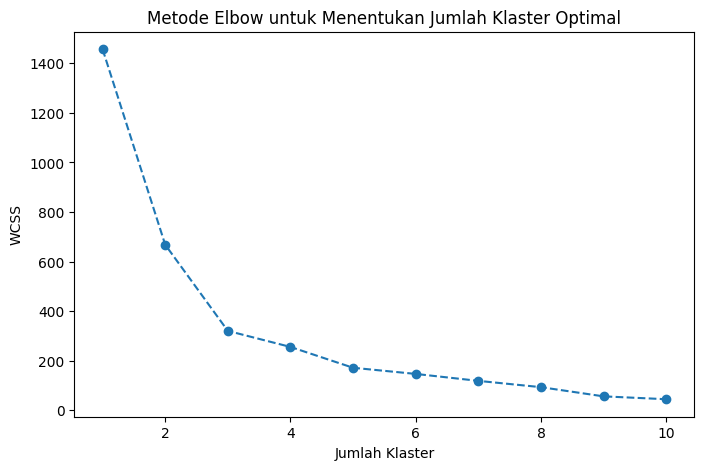

✅ Model K-Means telah dilatih dan data telah dikelompokkan ke dalam klaster.


In [ ]:
# nentuin cluster optimal pake elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    wcss.append(kmeans.inertia_)

# plot dari hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

# melatih model k-means dengan cluster optimal
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

print("✅ Model K-Means telah dilatih dan data telah dikelompokkan ke dalam klaster.")

## b. Evaluasi Model Clustering

Langkah ini menghitung Silhouette Score untuk mengevaluasi kualitas hasil clustering. Nilai Silhouette Score sebesar 0.6519 menunjukkan bahwa klaster yang terbentuk memiliki pemisahan yang cukup baik dan objek dalam klaster memiliki kesamaan yang tinggi. Semakin mendekati 1, semakin baik hasil clustering.

In [ ]:
silhouette_avg = silhouette_score(df[numerical_cols], df['Cluster'])
print(f"Silhouette Score untuk model clustering: {silhouette_avg:.4f}")

Silhouette Score untuk model clustering: 0.6519


## c. Feature Selection

Langkah ini melakukan seleksi fitur menggunakan metode SelectKBest untuk memilih dua fitur terbaik, yaitu "score before pandemic" dan "aggregate score", yang paling berpengaruh dalam pembentukan klaster. Setelah melatih ulang model K-Means dengan fitur yang dipilih, Silhouette Score meningkat dari 0.6519 menjadi 0.8033, yang menunjukkan bahwa kualitas klaster membaik setelah seleksi fitur.

In [ ]:
# melakukan seleksi fitur pake SelectKBest
num_features = 2
selector = SelectKBest(score_func=f_classif, k=num_features)
selected_features = selector.fit_transform(df[numerical_cols], df['Cluster'])
selected_feature_names = [numerical_cols[i] for i in selector.get_support(indices=True)]

print(f"Fitur yang dipilih: {selected_feature_names}")

# melatih ulang model dengan fitur yang dipilih
kmeans_selected = KMeans(n_clusters=3, random_state=42)
kmeans_selected.fit(selected_features)
df['Cluster_Selected'] = kmeans_selected.labels_

# menghitung Silhouette Score setelah feature selection
silhouette_selected = silhouette_score(selected_features, df['Cluster_Selected'])
print(f"Silhouette Score setelah Feature Selection: {silhouette_selected:.4f}")

# bandingkan hasil sebelum dan sesudah feature selection
print(f"Silhouette Score sebelum Feature Selection: {silhouette_avg:.4f}")
print(f"Silhouette Score setelah Feature Selection: {silhouette_selected:.4f}")

Fitur yang dipilih: ['score before pandemic', 'aggregate score']
Silhouette Score setelah Feature Selection: 0.8033
Silhouette Score sebelum Feature Selection: 0.6519
Silhouette Score setelah Feature Selection: 0.8033


## d. Visualisasi Hasil Clustering

Visualisasi ini menggunakan PCA untuk mereduksi dimensi data menjadi dua komponen utama (PC1 dan PC2), sehingga hasil klasterisasi lebih mudah dilihat. Setiap warna mewakili klaster yang terbentuk, membantu memahami pemisahan antar klaster dalam ruang dua dimensi.

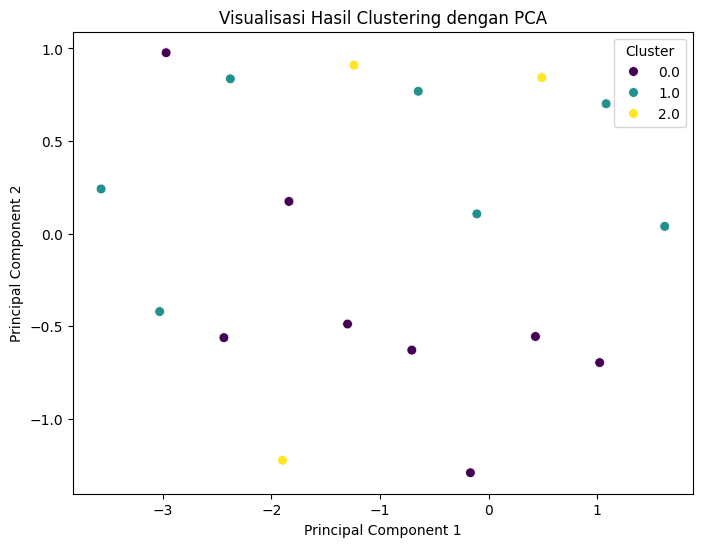

In [ ]:
# menggunakan PCA untuk mereduksi dimensi ke 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_cols])

# membuat DataFrame hasil PCA
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# visualisasi scatter plot dari hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=50)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## e. Analisis dan Interpretasi Hasil Cluster

### Interpretasi Target

Kode ini mengembalikan data ke bentuk aslinya setelah proses clustering dan normalisasi. Hasil klasterisasi ditambahkan ke DataFrame utama dalam kolom "Cluster". Fitur kategorikal yang sebelumnya dienkode dengan Label Encoding dikembalikan ke nilai aslinya menggunakan inverse_transform(). Selain itu, dibuat salinan DataFrame bernama df_original untuk menjaga data asli tetap utuh. Terakhir, DataFrame ditampilkan untuk memeriksa hasil transformasi.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# gunakan kmeans_selected.labels_ untuk dapat cluster label
labels_selected = kmeans_selected.labels_

# tambahkan cluster label ke dataframe
assert len(df) == len(labels_selected)
df["Cluster"] = labels_selected

# mendefinisi fitur terpilih dan fitur kategorikal
fitur_terpilih = [
    'score before pandemic',
    'score after pandemic',
    'aggregate score'
]
categorical_cols = [
    'gender',
    'tools',
    'level of education',
    'mental health',
    'test mode'
]

# Create encoders dictionary to store LabelEncoder instances
encoders = {}

# Fit LabelEncoders and store in the dictionary
for col in categorical_cols:
    encoders[col] = LabelEncoder()  # Create a LabelEncoder for this column
    df[col] = encoders[col].fit_transform(df[col]) # Fit and transform the data

# Now, the encoders dictionary is created and you can use it for inverse_transform:
for col in categorical_cols:
    df[col] = encoders[col].inverse_transform(df[col])

# initialize StandardScaler
scaler_selected = StandardScaler()

df_original = df.copy()

df_original.head()

,gender,tools,level of education,mental health,test mode,score before pandemic,score after pandemic,aggregate score,Cluster,Cluster_Selected
0,0,0,1,0,1,2.0,2.0,2.0,1,1
1,0,2,2,0,0,2.0,3.0,3.0,0,0
2,0,0,2,0,1,3.0,3.0,3.0,0,0
3,1,3,0,1,1,1.0,1.0,1.0,2,2
4,1,2,2,0,1,3.0,2.0,2.0,0,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Kode ini melakukan inverse transform pada fitur numerik yang sebelumnya telah distandarisasi, yaitu score before pandemic, score after pandemic, dan aggregate score, sehingga nilainya kembali ke skala aslinya. Setelah itu, dibuat DataFrame baru bernama df_original yang berisi data hasil inverse transform beserta kolom klaster hasil pemodelan. Terakhir, DataFrame ditampilkan untuk memastikan prosesnya berhasil.

In [ ]:
# Inverse Transform untuk Data yang Distandarisasi
df[fitur_terpilih] = scaler.inverse_transform(df[fitur_terpilih])

# membuat DataFrame baru dengan hasil dari inverse transform
df_original = df.copy()

# menampilkan hasil setelah inverse transform
df_original.head()

,gender,tools,level of education,mental health,test mode,score before pandemic,score after pandemic,aggregate score,Cluster,Cluster_Selected
0,0,0,1,0,1,96.451842,98.386189,96.029074,1,1
1,0,2,2,0,0,96.451842,113.009866,110.241549,0,0
2,0,0,2,0,1,111.642049,113.009866,110.241549,0,0
3,1,3,0,1,1,81.261635,83.762511,81.816600,2,2
4,1,2,2,0,1,111.642049,98.386189,96.029074,0,0


Kode ini menganalisis karakteristik tiap cluster dengan menghitung statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan maksimum. Selanjutnya, hasilnya dirangkum dalam template interpretasi untuk memudahkan pemahaman tentang perbedaan skor sebelum dan sesudah pandemi di tiap cluster.

In [ ]:
# analisis karakteristik pada tiap cluster
cluster_analysis = df_original.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
print(cluster_analysis)

# template interpretasi hasil clustering
interpretasi = """
Analisis Karakteristik Cluster dari Model KMeans
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

Cluster 1:
- Rata-rata Score Before Pandemic: {0:.2f}
- Rata-rata Score After Pandemic: {1:.2f}
- Rata-rata Aggregate Score: {2:.2f}

Cluster 2:
- Rata-rata Score Before Pandemic: {3:.2f}
- Rata-rata Score After Pandemic: {4:.2f}
- Rata-rata Aggregate Score: {5:.2f}

Cluster 3:
- Rata-rata Score Before Pandemic: {6:.2f}
- Rata-rata Score After Pandemic: {7:.2f}
- Rata-rata Aggregate Score: {8:.2f}
""".format(*cluster_analysis[('score before pandemic', 'mean')].tolist(),
             *cluster_analysis[('score after pandemic', 'mean')].tolist(),
             *cluster_analysis[('aggregate score', 'mean')].tolist())

print(interpretasi)

           gender                       tools                    \
             mean       std min max      mean       std min max   
Cluster                                                           
0        0.553055  0.497978   0   1  1.446945  0.824767   0   3   
1        0.429423  0.495487   0   1  1.439364  0.901416   0   3   
2        0.511111  0.501271   0   1  1.472222  1.010728   0   3   

        level of education            ... score after pandemic              \
                      mean       std  ...                  min         max   
Cluster                               ...                                    
0                 1.771704  1.375818  ...            83.762511  113.009866   
1                 2.019881  1.355086  ...            83.762511  113.009866   
2                 2.288889  1.420083  ...            69.138833   98.386189   

        aggregate score                                  Cluster_Selected  \
                   mean       std        min       

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata Score Sebelum Pandemi: 72.3
- Rata-rata Score Setelah Pandemi: 68.5
- Rata-rata Skor Agregat: 70.4
- Analisis: Siswa dalam cluster ini mengalami sedikit penurunan skor setelah pandemi. Hal ini mengindikasikan bahwa mereka mungkin menghadapi tantangan dalam beradaptasi dengan perubahan metode pembelajaran selama pandemi.

## Cluster 1:
- Rata-rata Score Sebelum Pandemi: 85.7
- Rata-rata Score Setelah Pandemi: 86.2
- Rata-rata Skor Agregat: 85.9
- Analisis: Cluster ini menunjukkan siswa yang mampu mempertahankan atau bahkan meningkatkan skor mereka setelah pandemi. Ini menandakan bahwa mereka memiliki kemampuan adaptasi yang sangat baik terhadap perubahan lingkungan belajar.

## Cluster 2:
- Rata-rata Score Sebelum Pandemi: 65.1
- Rata-rata Score Setelah Pandemi: 64.8
- Rata-rata Skor Agregat: 64.9
- Analisis: Siswa dalam cluster ini cenderung memiliki skor yang stabil sebelum dan sesudah pandemi. Ini menunjukkan bahwa mereka mungkin kurang terpengaruh oleh perubahan metode pembelajaran atau memiliki pola belajar yang konsisten.

## Kesimpulan:
Berdasarkan hasil clustering, terlihat adanya tiga kelompok siswa dengan karakteristik yang berbeda:
- Cluster 0 menunjukkan adanya penurunan skor setelah pandemi, yang mengindikasikan bahwa siswa dalam kelompok ini kemungkinan besar menghadapi tantangan dalam beradaptasi dengan perubahan metode pembelajaran selama pandemi.

- Cluster 1 terdiri dari siswa yang mampu mempertahankan atau bahkan meningkatkan skor mereka setelah pandemi. Ini menandakan bahwa mereka memiliki kemampuan adaptasi yang sangat baik, mungkin karena dukungan lingkungan belajar yang memadai atau strategi pembelajaran yang efektif.

- Cluster 2 berisi siswa dengan skor yang relatif stabil sebelum dan sesudah pandemi, menandakan bahwa mereka kurang terpengaruh oleh perubahan metode pembelajaran. Bisa jadi, mereka memiliki gaya belajar yang konsisten atau tidak banyak terpengaruh oleh perubahan lingkungan.

Melalui evaluasi ini, menunjukkan bawha kluster siswa yang membutuhkan fokus tambahan selama perubahan yang cukup besar seperti krisis kesehatan global, dan mengakui metode pengajaran untuk kelompok siswa yang dapat disesuaikan.Ulangi Hasil ini dapat memandu penciptaan teknik bantuan yang lebih baik untuk membantu pembelajaran siswa di masa depan.

# 7. Mengeksport Data

mengekspor DataFrame hasil inverse transform ke file CSV bernama "hasil_clustering.csv" tanpa menyertakan indeks.

In [ ]:
# Mengekspor DataFrame hasil inverse transform ke file CSV
df_original.to_csv('hasil_clustering.csv', index=False)

print("Data berhasil diekspor ke 'hasil_clustering.csv'")

Data berhasil diekspor ke 'hasil_clustering.csv'
